# DATA EXPLORATION

# FRAUD DETECTION

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
data.shape 

(230596, 7)

In [4]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [5]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [6]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


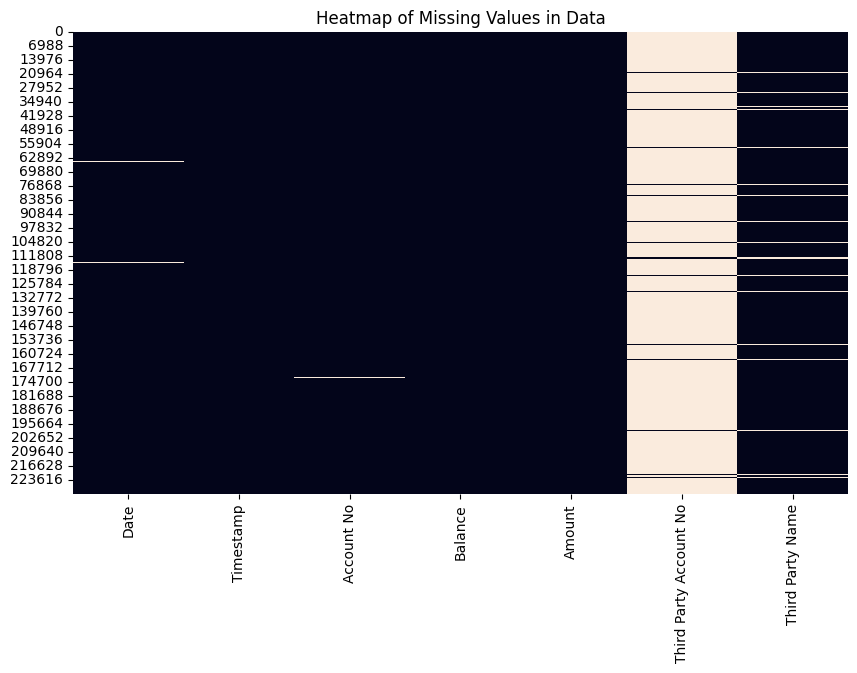

In [7]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Data')
plt.show()

### This map is not giving clear missing values, as we have a large dataset, lets proceed normally

In [8]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [9]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [10]:
# 'Account No' and number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

transactions_count = transactions_per_user.reset_index(name='Number of Transactions')
transactions_count.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [11]:
# finding average number of transactions of all users
#avg_transaction_per_user = 
transactions_per_user.mean()
#avg_transaction_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [12]:
# Generating unique account number to remove null values
existing_acc_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_acc_number = int(max(existing_acc_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_acc_number, inplace=True)

# Verifyong that there are no null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_acc_number, verification_result

(999752673, 0)

In [13]:
print(data[(data['Account No'] == 999752673)  ])

              Date Timestamp   Account No       Balance   Amount  \
527     01/01/2023     00:00  999752673.0    813.000000 -1143.00   
1295    01/01/2023     00:00  999752673.0   2284.030000   -18.99   
1335    01/01/2023     00:00  999752673.0   1542.030000   -18.99   
1563    01/01/2023     00:00  999752673.0   3351.010000   -15.99   
1703    01/01/2023     00:00  999752673.0   3785.780000   -18.99   
...            ...       ...          ...           ...      ...   
223332  30/11/2023     23:59  999752673.0  -1043.893200    -7.99   
223657  30/11/2023     23:59  999752673.0  11517.049529   -15.99   
226353  30/11/2023     23:59  999752673.0  -1692.102105   -15.99   
229119  04/12/2023     10:03  999752673.0   2619.340104  -225.37   
230360  06/12/2023     11:34  999752673.0     30.958899  -111.36   

        Third Party Account No Third Party Name  
527                        NaN          Halifax  
1295                       NaN          PureGym  
1335                       NaN   

## what is done till now:
- data exploration, using functions like shape(),info(),isnull().sum(),describe(), dtypes().
- imputing null values in account number: by the taking the the average transaction count (taking mean),which is 236, and our missing values count is 224. So, I decided to generate a new account number instead of removing them.


In [14]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [15]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [16]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [17]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [18]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [19]:
data['Account No'].nunique() ## total no.of users

977

In [20]:
## find unique and similarities

In [21]:
data.nunique()

Date              340
Timestamp        1401
Account No        977
Balance        229888
Amount          17314
Third Party       756
dtype: int64

## filling missing values in date and timestamp :
##### 1. Date and Timestamp
- Method Used: Forward Fill
- Why?
- Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time   series data.
- Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
- This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.

In [22]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

In [23]:
# Convert the 'not_happened_yet_date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### i want to impute the missing values in amount and balance column  as well, but I have observed some abnormalities in account transactions

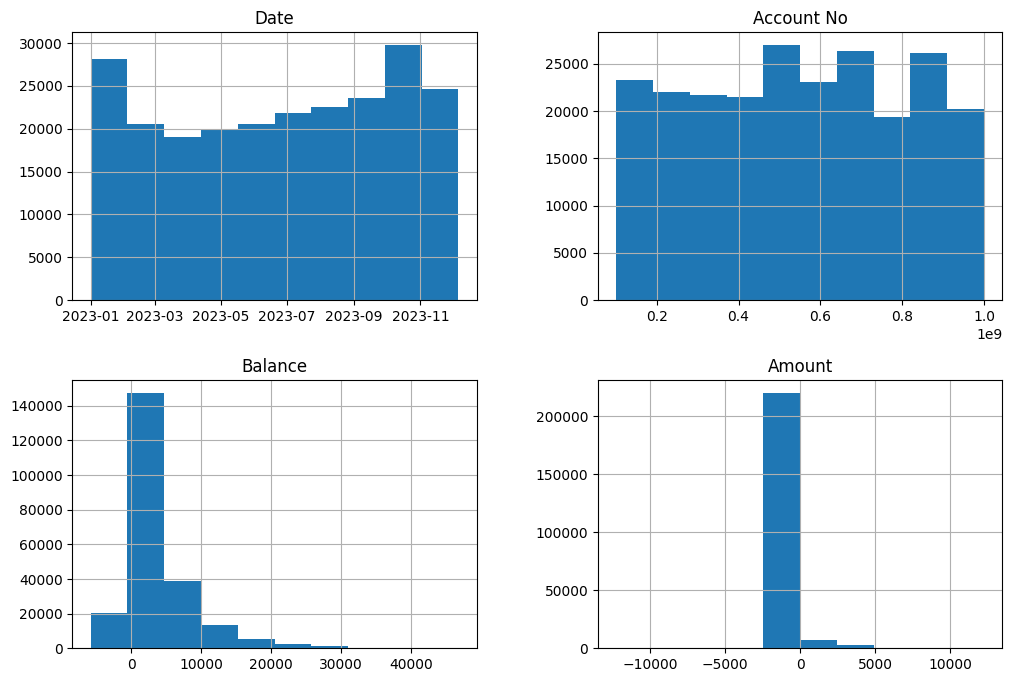

In [24]:
data.hist( figsize = (12,8) )
plt.show() ## to see the distributions of data

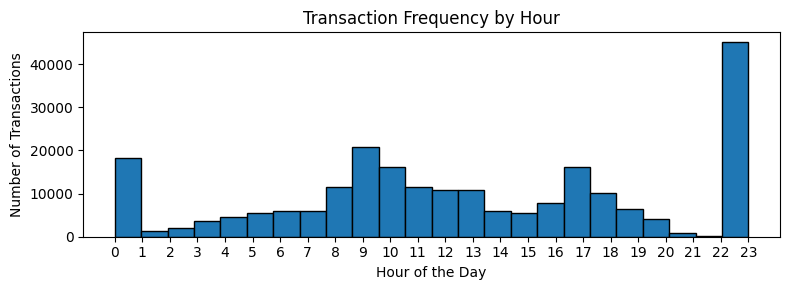

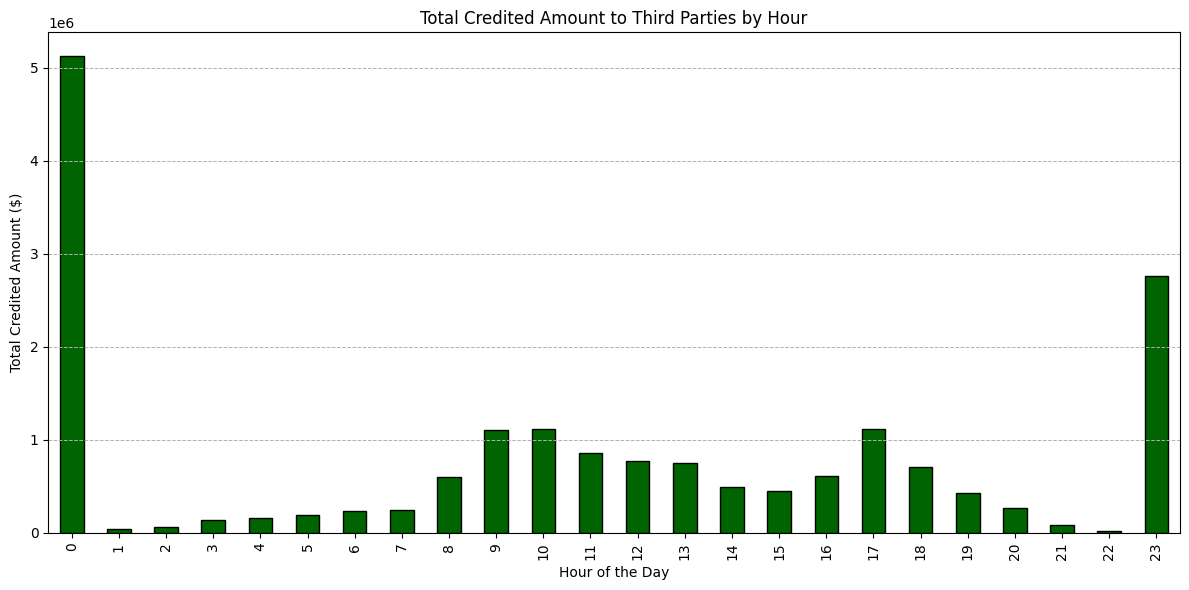

In [25]:
# Plot the transaction frequency by hour
plt.figure(figsize=(8, 3))
plt.hist(pd.to_datetime(data['Timestamp']).dt.hour, bins=24, edgecolor='black')
plt.title('Transaction Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

# Plot the total credited amount to third parties by hour
plt.figure(figsize=(12, 6))
data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp']).dt.hour)['Amount'].apply(lambda x: abs(x).sum()).plot(
    kind='bar', color='darkgreen', edgecolor='black')
plt.title('Total Credited Amount to Third Parties by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Credited Amount ($)')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()


## First plot:
- transaction frequency by hour (activity at certain times of the day). 
- It appears that there's a peak in transactions towards the end of the day, around 23:00. 
## second plot:
- plot shows the total credited amount to third parties by hour.
- presents the absolute values of the negative amounts to reflect the spending positively.

## how to impute amount and balance column 

## analyze the relationship between transaction direction (debit/credit) and balance:
1. Segment the Data
2. Statistical Summary
3. Visual Analysis

In [26]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [27]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

print("Debit Statistics:\n", debit_stats)
print("\nCredit Statistics:\n", credit_stats)

Debit Statistics:
 count    219720.000000
mean       3614.063005
std        5413.275727
min       -5790.983500
25%         353.936729
50%        1655.662325
75%        5270.588609
max       46184.158837
Name: Balance, dtype: float64

Credit Statistics:
 count    10412.000000
mean      3504.925524
std       4583.028230
min      -4678.910000
25%        868.477202
50%       2137.070230
75%       4362.312796
max      46804.158837
Name: Balance, dtype: float64


In [28]:
# Sort data by Date and Account No
data.sort_values(by=['Account No', 'Date'], inplace=True)

# Interpolate missing values for Balance and Amount
data['Balance'] = data['Balance'].interpolate(method='linear')
data['Amount'] = data['Amount'].interpolate(method='linear')

In [29]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

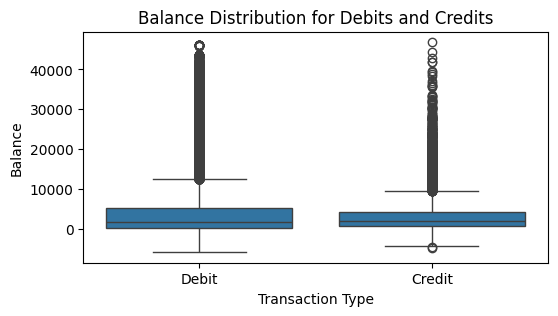

In [30]:
# Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Plotting the distribution of Balances for debits and credits
plt.figure(figsize=(6,3))
sns.boxplot(x='Transaction Type', y='Balance', data=data)
plt.title('Balance Distribution for Debits and Credits')
plt.xlabel('Transaction Type')
plt.ylabel('Balance')
plt.show()

In [31]:
# Find the highest debit transaction (considering absolute values)
highest_debit = data[data['Transaction Type'] == 'Debit']['Amount'].abs().nlargest(1)

# Find the highest credit transaction
highest_credit = data[data['Transaction Type'] == 'Credit']['Amount'].nlargest(1)

print("Highest Debit Transaction:")
print(highest_debit)

print("\nHighest Credit Transaction:")
print(highest_credit)

Highest Debit Transaction:
199197    12240
Name: Amount, dtype: int32

Highest Credit Transaction:
199198    12240
Name: Amount, dtype: int32


In [33]:
# Convert 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Identify high-value transactions for debits
mean_debit_amounts = data[data['Transaction Type'] == 'Debit']['Amount'].mean()
std_debit_amounts = data[data['Transaction Type'] == 'Debit']['Amount'].std()
high_value_debit = (data['Transaction Type'] == 'Debit') & (data['Amount'] > (mean_debit_amounts + 3 * std_debit_amounts))

# Detect frequent debit transactions in short times by counting the transactions per minute for each account
frequent_debit_transactions = data[data['Transaction Type'] == 'Debit'].groupby(['Account No', data['Timestamp'].dt.floor('min')])['Amount'].transform('size') > 3

# Check for debit transactions that are round figures
round_figure_transaction = (data['Amount'].abs() % 1000 == 0) & (data['Amount'].abs() <= 12000)

# Combine the debit fraud detection criteria
fraudulent_debit_transactions = high_value_debit | frequent_debit_transactions | round_figure_transaction

# Print the number of fraudulent debit transactions
print("Number of fraudulent debit transactions:", fraudulent_debit_transactions.sum())

# Display the fraudulent debit transactions
fraudulent_debit_data = data[fraudulent_debit_transactions & (data['Transaction Type'] == 'Debit')]
fraudulent_debit_data.head()


Number of fraudulent debit transactions: 61454


,Date,Timestamp,Account No,Balance,Amount,Third Party,Transaction Type
912,2023-01-01,2024-04-29 00:00:00,101531259,124,-859,LBG,Debit
4036,2023-01-01,2024-04-29 00:00:00,101531259,116,-8,Disney,Debit
4037,2023-01-01,2024-04-29 00:00:00,101531259,16,-100,Grand Union BJJ,Debit
23227,2023-01-31,2024-04-29 23:59:00,101531259,-475,-8,Disney,Debit
23228,2023-01-31,2024-04-29 23:59:00,101531259,-575,-100,Grand Union BJJ,Debit


In [34]:
b=fraudulent_debit_data['Account No'].nunique()
b

970

In [35]:
a=data['Account No'].nunique()

In [36]:
non_fraudulent_accounts = a-b

In [ ]:
non_fraudulent_accounts

7

In [37]:
all_acc_numbers = set(data['Account No'].unique())

fraudulent_acc_numbers = set(fraudulent_debit_data['Account No'].unique())

# Calculate the non-fraudulent account numbers
non_fraudulent_acc_numbers = all_acc_numbers - fraudulent_acc_numbers

# Print the non-fraudulent account numbers
print("Non-fraudulent account numbers:", non_fraudulent_acc_numbers)


Non-fraudulent account numbers: {666952234, 936813994, 604870380, 299652176, 494404688, 198630866, 719742742}


# all these 7 users are free from fraud transactions